## 决策边界

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

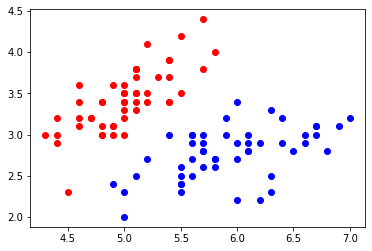

In [66]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [67]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [68]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\54271\Documents\Machine Learning\9 逻辑回归\playML\LogisticRegression.py:27: RuntimeWarning: divide by zero encountered in power
  return - np.sum(y**np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
C:\Users\54271\Documents\Machine Learning\9 逻辑回归\playML\LogisticRegression.py:45: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


LogisticRegression()

In [69]:
log_reg.coef_

array([ 3.8011217 , -6.28203018])

In [70]:
log_reg.interception_

-1.091307641296252

In [71]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [72]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

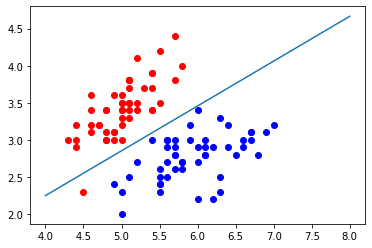

In [73]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

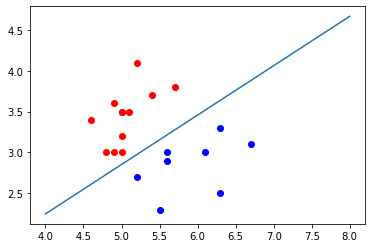

In [74]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

In [76]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-76-30ed53a468d8>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


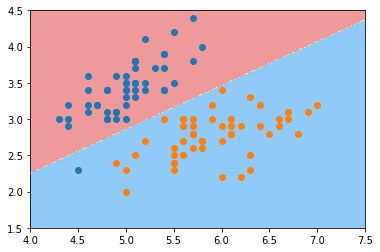

In [77]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### kNN的决策边界

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
knn_clf.score(X_test, y_test)

1.0

<ipython-input-76-30ed53a468d8>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


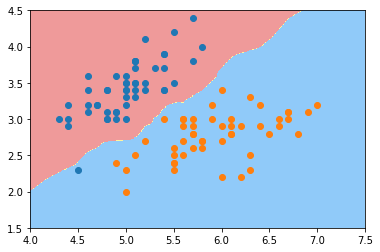

In [80]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### kNN多决策边界

In [81]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier()

<ipython-input-76-30ed53a468d8>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


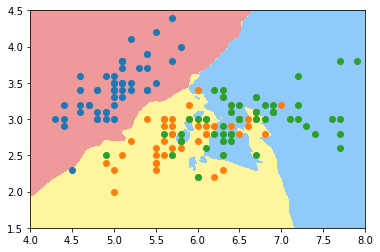

In [82]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

In [83]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(n_neighbors=50)

<ipython-input-76-30ed53a468d8>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


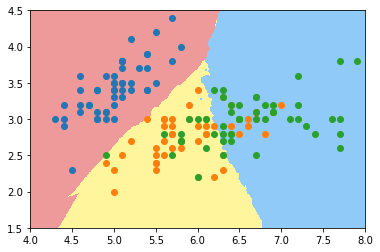

In [84]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()